In [1]:
import asyncio 
import matplotlib

import numpy as np
import pandas as pd

from matplotlib import pylab as plt
from astropy.time import Time, TimeDelta

from lsst_efd_client import EfdClient, resample

%matplotlib inline

In [2]:
efd_client = EfdClient('summit_efd')

In [3]:
t1 = Time("2020-01-26T01:46:00", format='isot', scale='tai')
t2 = Time("2020-01-26T08:01:00", format='isot', scale='tai')+TimeDelta(8.*24.*60*60., format='sec', scale='tai')

In [6]:
add_data = await efd_client.select_time_series("lsst.sal.ATPtg.command_pointAddData", 
                                               ["ignored"], t1, t2)

In [7]:
add_data

,ignored
2020-01-26 01:47:41.501997324+00:00,False
2020-01-26 02:18:25.280861372+00:00,False
2020-01-26 02:56:34.962103193+00:00,False
2020-01-26 02:56:47.663366936+00:00,False
2020-01-26 03:13:57.947872105+00:00,False
2020-01-26 03:14:13.140165718+00:00,False
2020-01-26 03:29:47.582190050+00:00,False
2020-01-26 03:42:34.643236736+00:00,False
2020-01-26 04:00:28.206203638+00:00,False
2020-01-26 04:28:48.309991709+00:00,False


In [31]:
lut_data = np.zeros(len(add_data), dtype=[('az', float), 
                                          ('el', float), 
                                          ('rot_pos', float),
                                          ('x', float), 
                                          ('y', float), 
                                          ('z', float), 
                                          ('u', float), 
                                          ('v', float), 
                                          ('w', float),
                                            ('std_x', float), 
                                            ('std_y', float), 
                                            ('std_z', float), 
                                            ('std_u', float), 
                                            ('std_v', float), 
                                            ('std_w', float)])

In [88]:
time_window = TimeDelta(20., format='sec', scale='tai')

In [123]:
for i in range(len(add_data)):
    time_start = Time(add_data.index[i], scale='tai')-time_window
    time_end = Time(add_data.index[i], scale='tai')  # +time_window

    azel = await efd_client.select_time_series("lsst.sal.ATMCS.mount_AzEl_Encoders", 
                                               ["elevationCalculatedAngle99", "azimuthCalculatedAngle99"], 
                                               time_start, time_end)

    rotator = await efd_client.select_time_series("lsst.sal.ATMCS.mount_Nasmyth_Encoders",
                                                  ["nasmyth1CalculatedAngle99"], 
                                                  time_start, time_end)

    
    hexapod = await efd_client.select_time_series("lsst.sal.ATHexapod.positionStatus",
                                                  ["reportedPosition0", 
                                                   "reportedPosition1", 
                                                   "reportedPosition2", 
                                                   "reportedPosition3", 
                                                   "reportedPosition4", 
                                                   "reportedPosition5"], 
                                                  time_start, time_end)

    az = np.mean(azel['azimuthCalculatedAngle99'])
    el = np.mean(azel['elevationCalculatedAngle99'])
    rot_pos = np.mean(rotator['nasmyth1CalculatedAngle99'])
    x = np.mean(hexapod["reportedPosition0"])
    y = np.mean(hexapod["reportedPosition1"])
    print(hexapod["reportedPosition1"])
    z = np.mean(hexapod["reportedPosition2"])
    u = np.mean(hexapod["reportedPosition3"])
    v = np.mean(hexapod["reportedPosition4"])
    w = np.mean(hexapod["reportedPosition5"])
    std_x = np.std(hexapod["reportedPosition0"])
    std_y = np.std(hexapod["reportedPosition1"])
    std_z = np.std(hexapod["reportedPosition2"])
    std_u = np.std(hexapod["reportedPosition3"])
    std_v = np.std(hexapod["reportedPosition4"])
    std_w = np.std(hexapod["reportedPosition5"])
    print(f"Got {len(hexapod)} hexapod data.")


    lut_data[i] = (az, el, rot_pos, x, y, z, u, u, w, std_x, std_y, std_z, std_u, std_u, std_w)
    

2020-01-26 01:47:21.937688418+00:00    0.452445
2020-01-26 01:47:22.934342883+00:00    0.452445
2020-01-26 01:47:23.944147530+00:00    0.452445
2020-01-26 01:47:25.003820211+00:00    0.452445
2020-01-26 01:47:25.983775266+00:00    0.452445
2020-01-26 01:47:27.017640280+00:00    0.452445
2020-01-26 01:47:28.027441429+00:00    0.452445
2020-01-26 01:47:29.048088124+00:00    0.452445
2020-01-26 01:47:30.038382334+00:00    0.452445
2020-01-26 01:47:31.054441028+00:00    0.452445
2020-01-26 01:47:32.067952208+00:00    0.452445
2020-01-26 01:47:33.088358762+00:00    0.452445
2020-01-26 01:47:34.103756579+00:00    0.452445
2020-01-26 01:47:35.127224959+00:00    0.452445
2020-01-26 01:47:36.174483034+00:00    0.452445
2020-01-26 01:47:37.157531424+00:00    0.452445
2020-01-26 01:47:38.224921630+00:00    0.452445
2020-01-26 01:47:39.202427299+00:00    0.452445
2020-01-26 01:47:40.193450766+00:00    0.452445
2020-01-26 01:47:41.212108575+00:00    0.452445
Name: reportedPosition1, dtype: float64


[0.52859514]
[ -7335.7102182   35878.23347625 -74375.59432387  84697.5338382
 -57222.91331359  22941.17455298  -5055.8689128     473.43396245]


(25.06832281641091, 81.33742690373565)

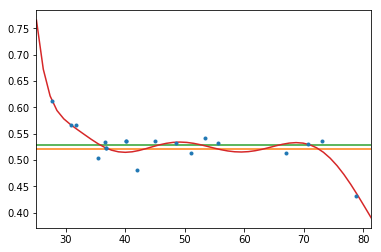

In [103]:
plt.errorbar(lut_data['el'], lut_data['z'], lut_data['std_z'], fmt='.')

xlim = plt.xlim()

# Sandrine coeff
coeff = [0.5200]

x = np.linspace(*xlim)
plt.plot(x,np.poly1d(coeff)(np.cos(np.radians(x))))

# Fit to the data

sort_data = np.argsort(lut_data['el'])
x_fit = np.cos(np.radians(90. - lut_data['el'][sort_data]))
y_fit = lut_data['z'][sort_data]

new_coeff = np.polyfit(x_fit, 
                       y_fit, 0)

new_coeff_2 = np.polyfit(x_fit, 
                         y_fit, 7)

plt.plot(x ,np.poly1d(new_coeff)(np.cos(np.radians(90. - x))))
plt.plot(x ,np.poly1d(new_coeff_2)(np.cos(np.radians(90. - x))))

print(new_coeff)
print(new_coeff_2)

plt.xlim(xlim)

[-1.23593198 -3.82187853]
[-4.7000197]
-4.740354985579031


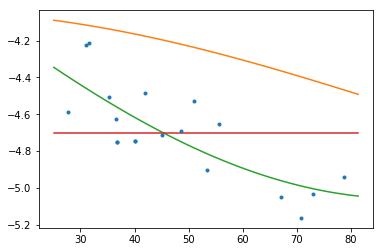

In [134]:
plt.errorbar(lut_data['el'], lut_data['x'], lut_data['std_x'], fmt='.')

xlim = plt.xlim()

# Sandrine coeff
coeff = [0.5321, -4.57206]

x = np.linspace(*xlim)
plt.plot(x,np.poly1d(coeff)(np.cos(np.radians(x))))

# Fit to the data

sort_data = np.argsort(lut_data['el'])
x_fit = np.cos(np.radians(90. - lut_data['el'][sort_data]))
y_fit = lut_data['x'][sort_data]

new_coeff_0 = np.polyfit(x_fit, 
                         y_fit, 0)

new_coeff = np.polyfit(x_fit, 
                       y_fit, 1)

plt.plot(x ,np.poly1d(new_coeff)(np.cos(np.radians(90. - x))))
plt.plot(x ,np.poly1d(new_coeff_0)(np.cos(np.radians(90. - x))))

print(new_coeff)
print(new_coeff_0)
print(np.poly1d([-1.23593198, -3.82187853])(np.cos(np.radians(90. - 48.))))
#plt.xlim(xlim)

[-0.96541287  1.76660044]
[1.08066562]
--> 1.0491588622065107


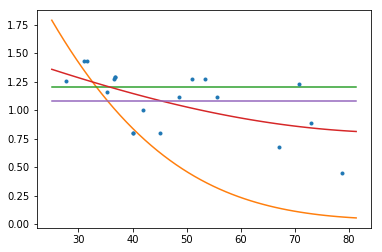

In [133]:
plt.errorbar(lut_data['el'], lut_data['y'], lut_data['std_y'], fmt='.')

xlim = plt.xlim()

# Sandrine coeff
coeff = [3.633, -8.20, 4.61]
coeff2 = [1.2000]

x = np.linspace(*xlim)
plt.plot(x,np.poly1d(coeff)(np.cos(np.radians(90.-x))))
plt.plot(x,np.poly1d(coeff2)(np.cos(np.radians(90.-x))))

# Fit to the data

sort_data = np.argsort(lut_data['el'])
x_fit = np.cos(np.radians(90. - lut_data['el'][sort_data]))
y_fit = lut_data['y'][sort_data]

new_coeff_0 = np.polyfit(x_fit, 
                       y_fit, 0)


new_coeff = np.polyfit(x_fit, 
                       y_fit, 1)


plt.plot(x ,np.poly1d(new_coeff)(np.cos(np.radians(90. - x))))
plt.plot(x ,np.poly1d(new_coeff_0)(np.cos(np.radians(90. - x))))

print(new_coeff)
print(new_coeff_0)
print(f"--> {np.poly1d(new_coeff)(np.cos(np.radians(90. - 48)))}")
#plt.xlim(xlim)

<ErrorbarContainer object of 3 artists>

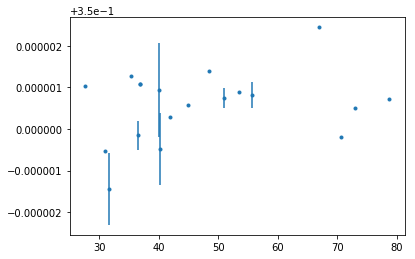

In [108]:
plt.errorbar(lut_data['el'], lut_data['u'], lut_data['std_u'], fmt='.')